In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


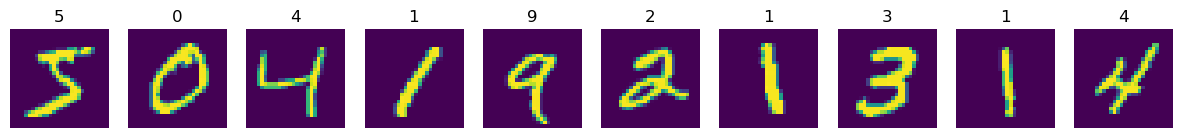

In [4]:
# Display the first 10 images along with their corresponding labels
num_images = 10
plt.figure(figsize=(15, 2))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')

plt.show()

In [5]:
#Normalizing the dataset
X_train = X_train/255
X_test = X_test/255

In [6]:
model = Sequential()

model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.8716 - loss: 0.4414 - val_accuracy: 0.9542 - val_loss: 0.1543
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.9670 - loss: 0.1105 - val_accuracy: 0.9691 - val_loss: 0.1025
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.9776 - loss: 0.0716 - val_accuracy: 0.9728 - val_loss: 0.0987
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.9841 - loss: 0.0521 - val_accuracy: 0.9695 - val_loss: 0.1014
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9866 - loss: 0.0417 - val_accuracy: 0.9744 - val_loss: 0.0977
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.9895 - loss: 0.0316 - val_accuracy: 0.9741 - val_loss: 0.1037
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.9903 - loss: 0.0274 - val_accuracy: 0.9715 - val_loss: 0.1136
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9935 -

In [9]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.9726 - loss: 0.1106


[0.09470668435096741, 0.9764000177383423]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step


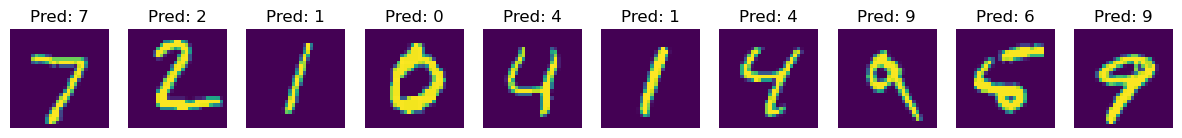

True labels:  [7 2 1 0 4 1 4 9 5 9]
Predictions:  [7 2 1 0 4 1 4 9 6 9]


In [10]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Display the first 10 images and their predictions
num_images = 10
plt.figure(figsize=(15, 2))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[i])
    plt.title(f'Pred: {predicted_classes[i]}')
    plt.axis('off')

plt.show()

# print the corresponding true labels for comparison
print("True labels: ", y_test[:num_images])
print("Predictions: ", predicted_classes[:num_images])

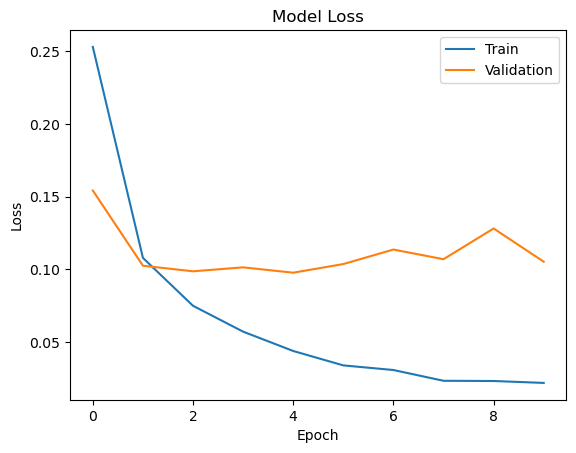

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

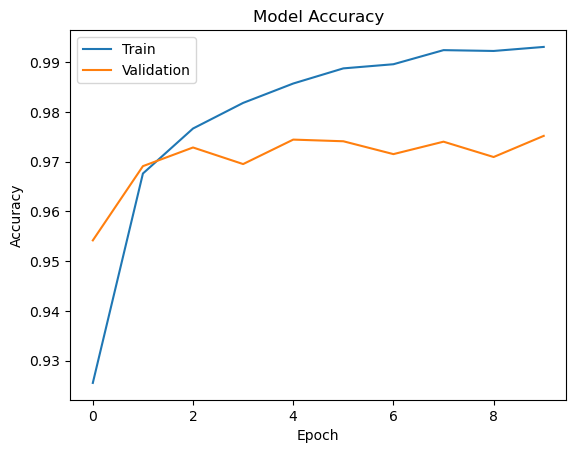

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])